# Dataset information
# ***About the Dataset***

# **Age** : Describes the age of individuals. Continuous.
# **Workclas** : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# **fnlwgt** : Continuous
# **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# **education-num** : Number of years spent in education. Continuous.
# **marital-status** : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# **race** : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

# dataset loading:


In [13]:
import pandas as pd
import numpy as np

df=pd.read_csv("adult.csv")

df.head() # read the data>>

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Step 1: ➡

#Exploring the data, and Features

In [14]:
df.shape
 # number of observations and features

(32561, 15)

In [15]:

df.dtypes # dataset datatypes check

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [16]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Some observations:**

## The minimum and maximum age of people in the dataset is **19** and **90** years respectively
## while the average age is **37**.

## The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.

## While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection or the system used to enter the data.

## The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

# for the numeric features/ categorical features:


In [17]:
cat=df.describe(include="object")
cat

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [18]:
#View summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
num=df.describe(include="int")

# Check for duplicate data

In [20]:
duplicates=df.duplicated()
duplicates.sum()

24

In [21]:
duplicates=df.duplicated()
duplicates.sum()

24

# Drop duplicated rows:

In [22]:
# drop dublicates:
df.drop_duplicates(inplace=True)

In [23]:
duplicates.sum()

24

### No duplicates are found

In [24]:
feat_miss=df.isna().sum() # missing values per feature
tot_mssing=df.isna().sum().sum() # number of missing cells
perc_missing=round(df.isna().sum().sum() / df.size * 100, 1) # percentage of missing cells

print("missing values per feature : \n" + str(feat_miss)+ "\n")
print("number of missing cells is :" + str(tot_mssing)+"\n")
print("percentage of missing cells is :" + str(perc_missing))

missing values per feature : 
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

number of missing cells is :0

percentage of missing cells is :0.0


In [25]:
df = df.drop(columns=['fnlwgt'])
# Remove this as it often does not contribute significantly to data analysis
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# check for missing values

# as previous output shows that there is no missing values , but the dataset already is having missing values represented by" ?" mark in the cell

In [26]:
# for example :
df["workclass"].head()

,workclass
0,?
1,Private
2,?
3,Private
4,Private


# so we will convert these " ?" to nan:

In [27]:
df[df == '?'] = np.nan

In [28]:
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# re-check for missing values :

In [29]:
print("missing values per feature : \n" + str(feat_miss)+ "\n")
print("number of missing cells is :" + str(tot_mssing)+"\n")
print("percentage of missing cells is :" + str(perc_missing))


missing values per feature : 
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

number of missing cells is :0

percentage of missing cells is :0.0


In [30]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# missing values imputation
## we will use mode to impute missing "NaN" values, based on most freq value:

# for those features:
native.country, occupation, workclass


In [31]:
df.isnull().sum().sum()

0

In [32]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# re-check on missing values :

# Step 2: ➡


# **Data Visualization**

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


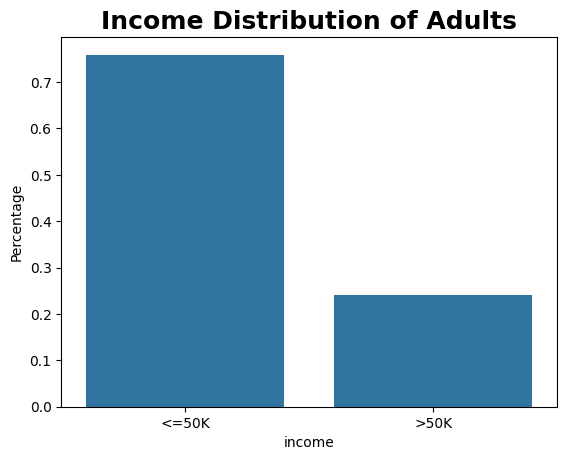

In [34]:
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage)


The number of people earning more than 50K dollars an year is one third of the people earning less than it.
We should also keep in mind that this data was collected in 1996, so 50K dollars of that tme, might not be the same in today's time!

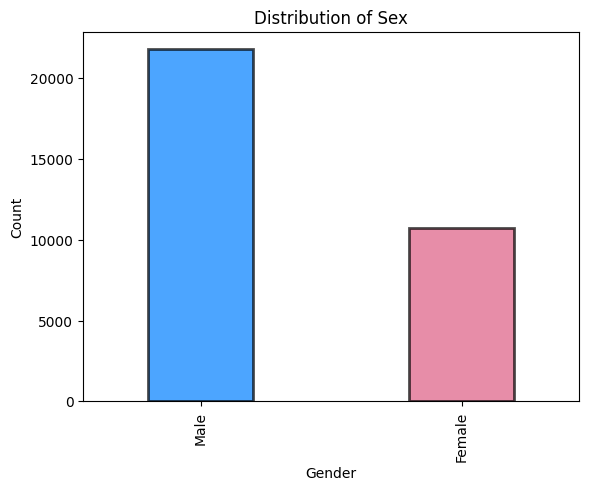

In [35]:
import matplotlib.pyplot as plt



# Plotting the bar plot for the "sex" field
sex_counts = df['sex'].value_counts()
sex_counts.plot(kind='bar', color=['#007fff', '#de5d83'], alpha=0.7, width=0.4, edgecolor='black', linewidth=2)

plt.title('Distribution of Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


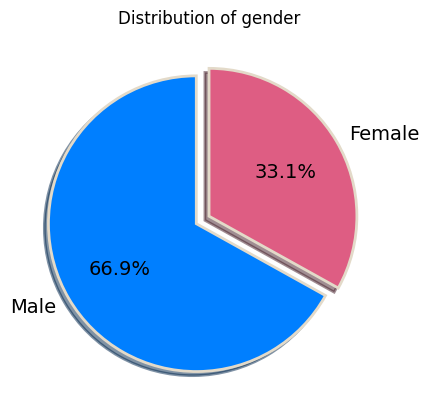

In [36]:
import matplotlib.pyplot as plt

# Plotting the pie chart for the "sex" field
sex_counts = df['sex'].value_counts()
sex_counts.plot(kind='pie', colors=['#007fff', '#de5d83'], autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0),
                wedgeprops={'edgecolor': '#e3dac9', 'linewidth': 2},
                textprops={'fontsize': 14},
                 )

plt.title('Distribution of gender')
plt.ylabel('')  # This removes the y-label since it's not needed in a pie chart
plt.show()



gender distribution among the dataset

# Now try to plot the age ranges to see income across diffrenet employee ages

In [37]:
# sorted list of age:
df["age"].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90])

In [38]:
def age_group(x):
    x = int(x)
    x = abs(x)

    if( 18 < x < 31 ):
        return "17-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"

    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

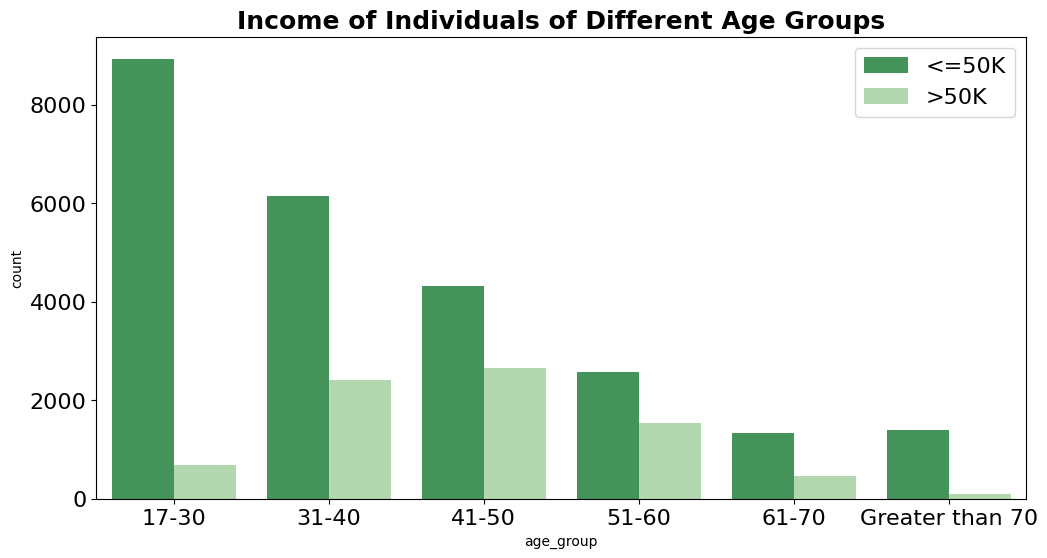

In [39]:
plt.figure(figsize=(12,6))
order_list = ["17-30", '31-40', '41-50', '51-60', '61-70','Greater than 70']

sns.countplot(data=df,x="age_group", hue ='income', palette='Greens_r', order = order_list)


plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

As one might imagine, the number of people earning more than 50K is quite negligible amongst people of age group 19-30.
For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it!

<ipython-input-40-dc3be7e0e4bb>:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data= df, x= df['workclass'], hue = df['income'], palette=sns.color_palette("hls", 8))


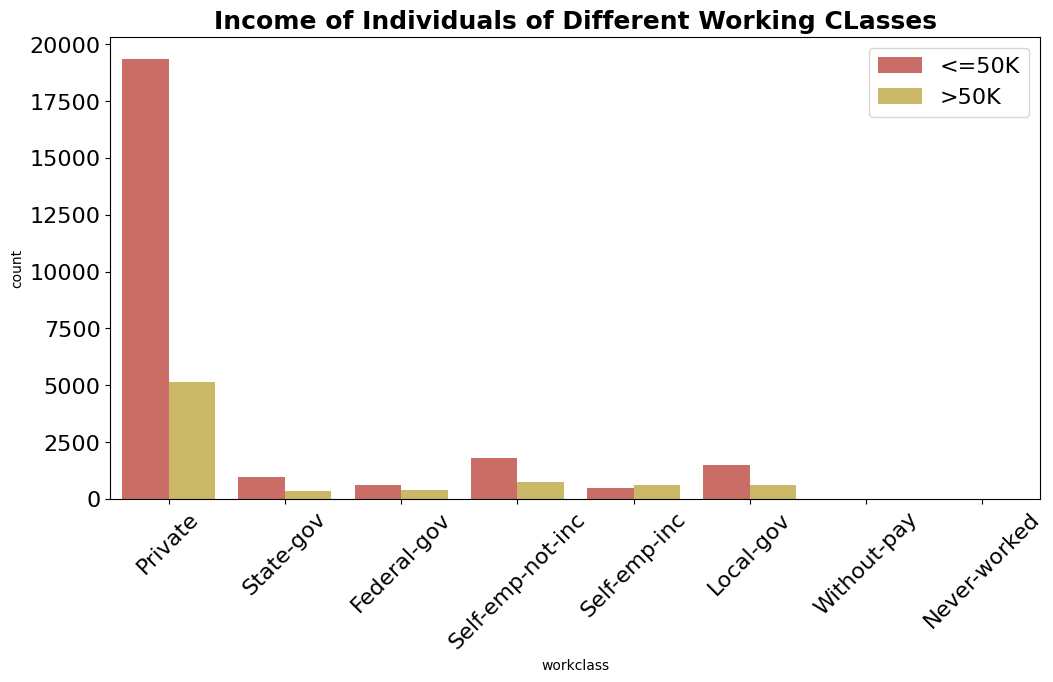

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data= df, x= df['workclass'], hue = df['income'], palette=sns.color_palette("hls", 8))

plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 45)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Here’s a simpler version of your insights:

**Self-Employed**: This is the only category where more people earn over $50K than under it. This suggests that running your own business might lead to higher earnings if it succeeds.

**Private Sector**: A significant majority (over 75%) earn less than $50K annually, indicating a large income disparity.

**Federal Government**: The number of people earning above and below $50K is almost equal, showing little difference.

**Without-Pay and Never-Worked**: These categories have very few people in either income group, indicating limited data.

<ipython-input-41-5cb5c7f2bed1>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=df['education'], hue = df['income'], palette=sns.color_palette("colorblind"), order= order_list)


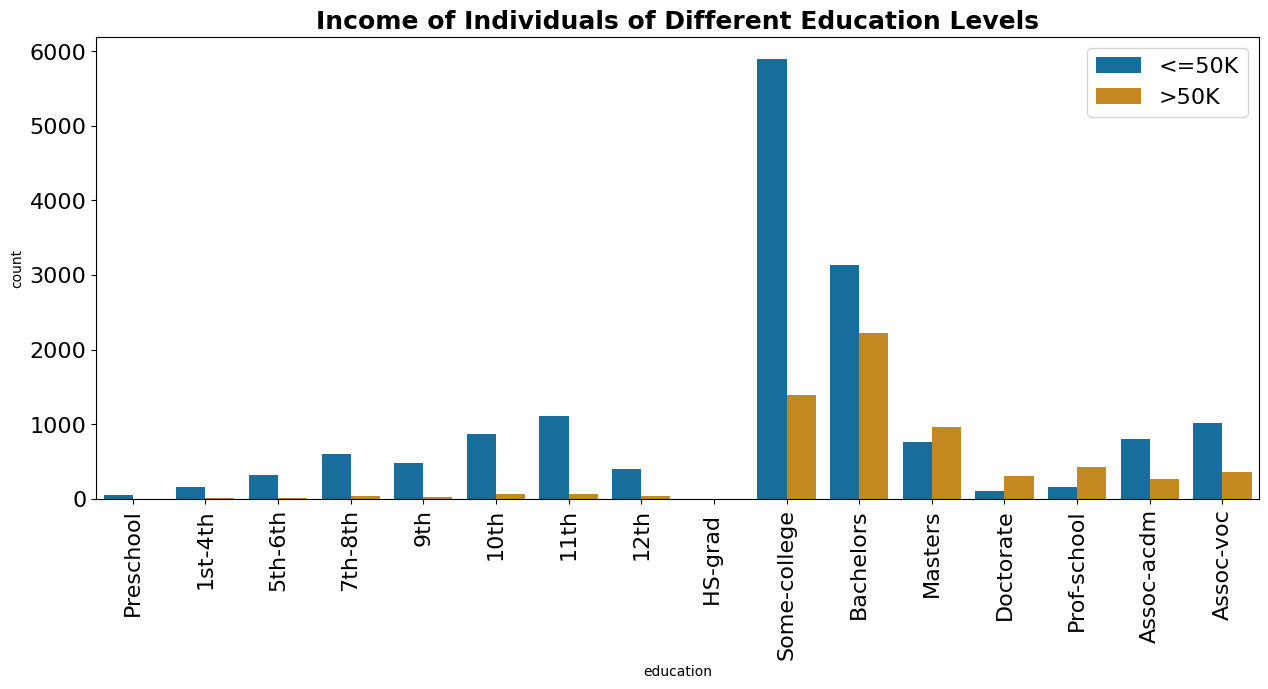

In [41]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(data=df, x=df['education'], hue = df['income'], palette=sns.color_palette("colorblind"), order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


**12th Standard**: Most people with this level of education earn less than
 50K annually, with only a few earning more.

**Bachelors, Masters, Doctorate, Prof-school**: In these education categories, more people earn over 50K than those earning less, indicating higher earning potential with advanced education.

**Assoc-acad or Assoc-voc**: There are a few individuals in these groups who earn more than 50K annually.

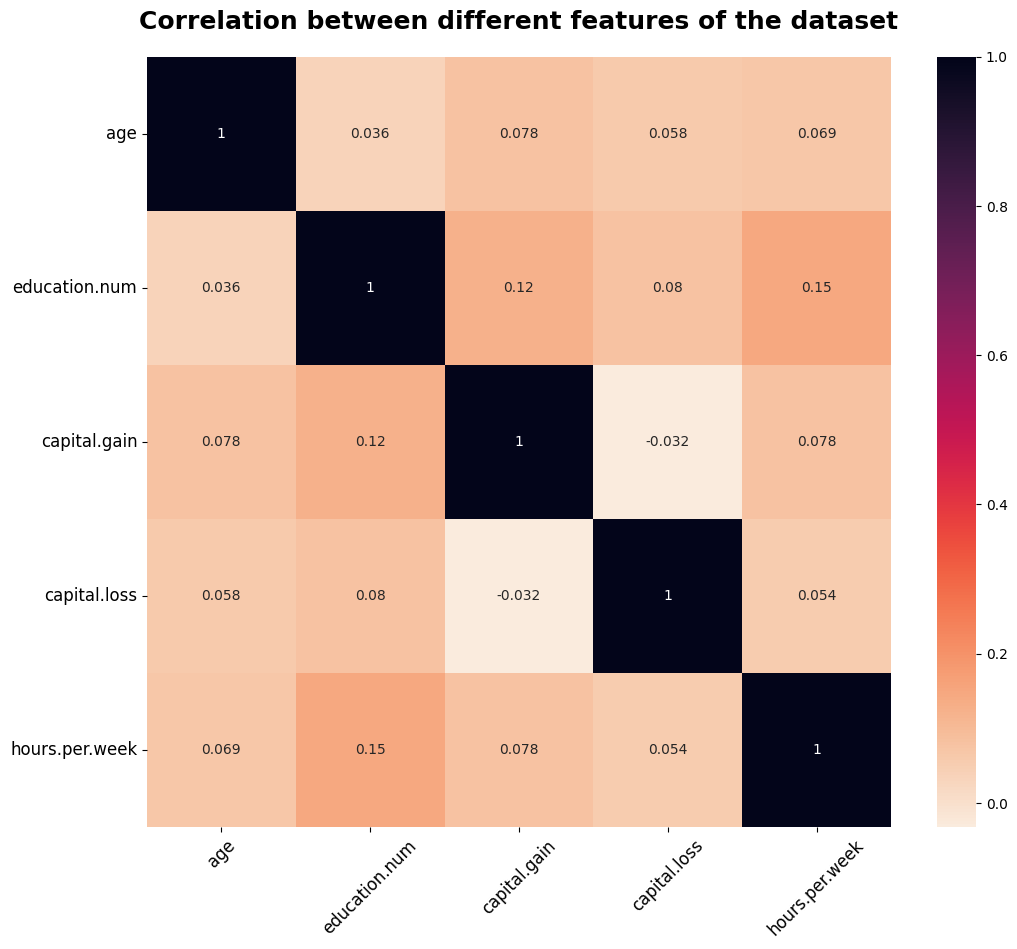

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12,10))
plt.title("Correlation between different features of the dataset", fontsize=18, fontweight='bold', pad=20)
sns.heatmap(numeric_df.corr(), cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()


<Axes: xlabel='age', ylabel='Density'>

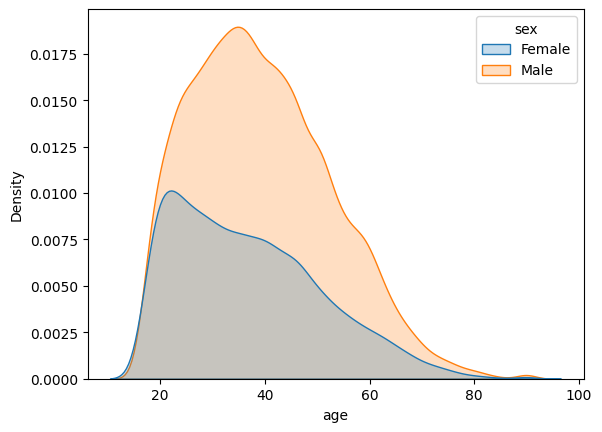

In [43]:
sns.kdeplot(x='age', hue ='sex', data=df, fill = True)


In [44]:
# workclass
df.groupby('workclass').size()

,0
workclass,
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,24509
Self-emp-inc,1116
Self-emp-not-inc,2540
State-gov,1298
Without-pay,14


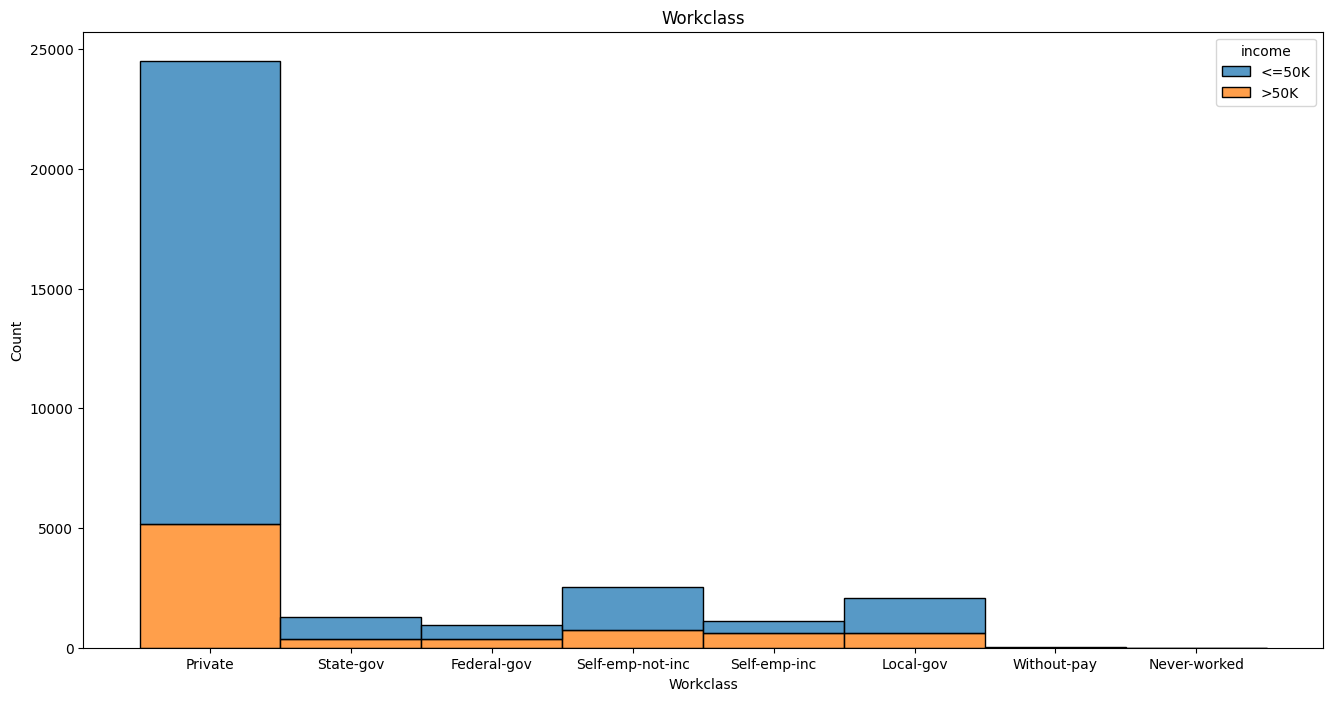

In [45]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='workclass', hue='income', multiple='stack')

plt.xlabel('Workclass')
plt.title('Workclass')

plt.show()

In [46]:
df.groupby('education').size()


,0
education,
10th,933
11th,1175
12th,433
1st-4th,166
5th-6th,332
7th-8th,645
9th,514
Assoc-acdm,1067
Assoc-voc,1382


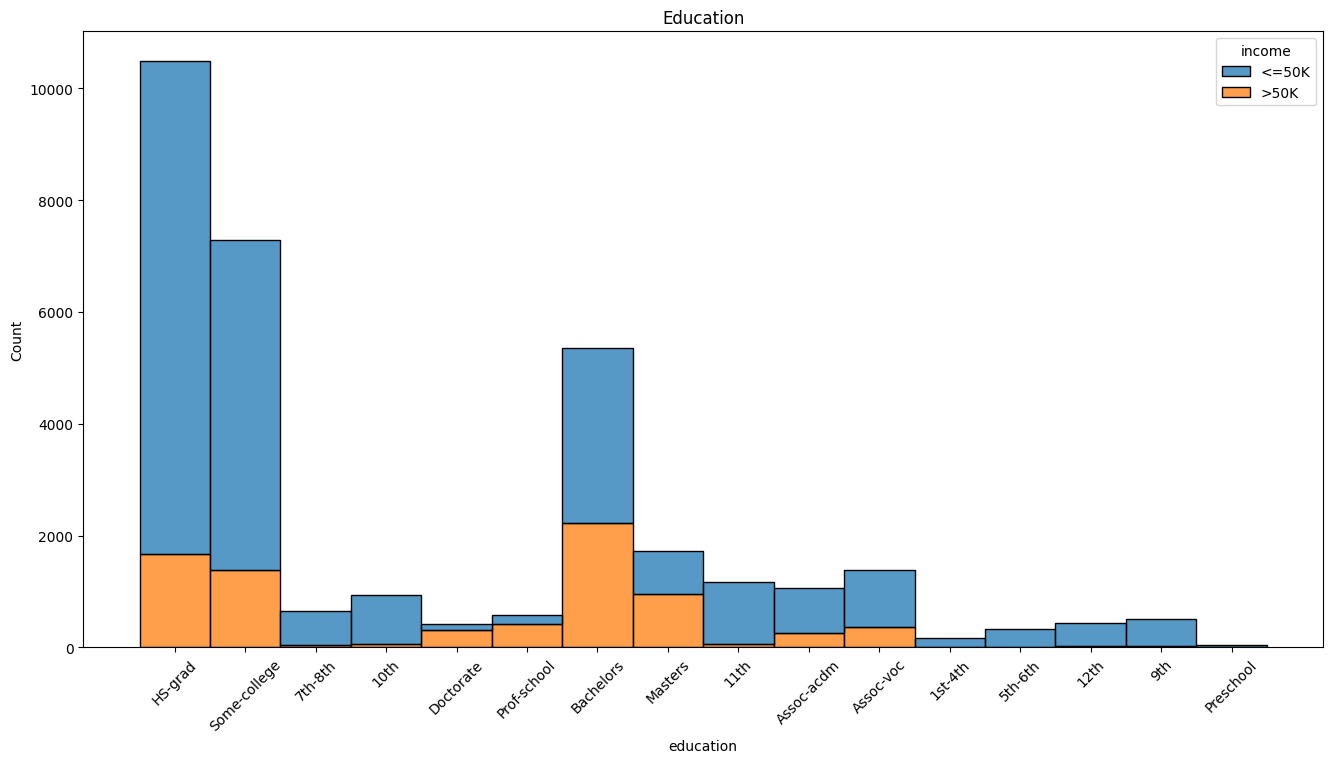

In [47]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='education', hue='income', multiple='stack')

plt.xlabel('education')
plt.title('Education')

plt.xticks(rotation=45)

plt.show()

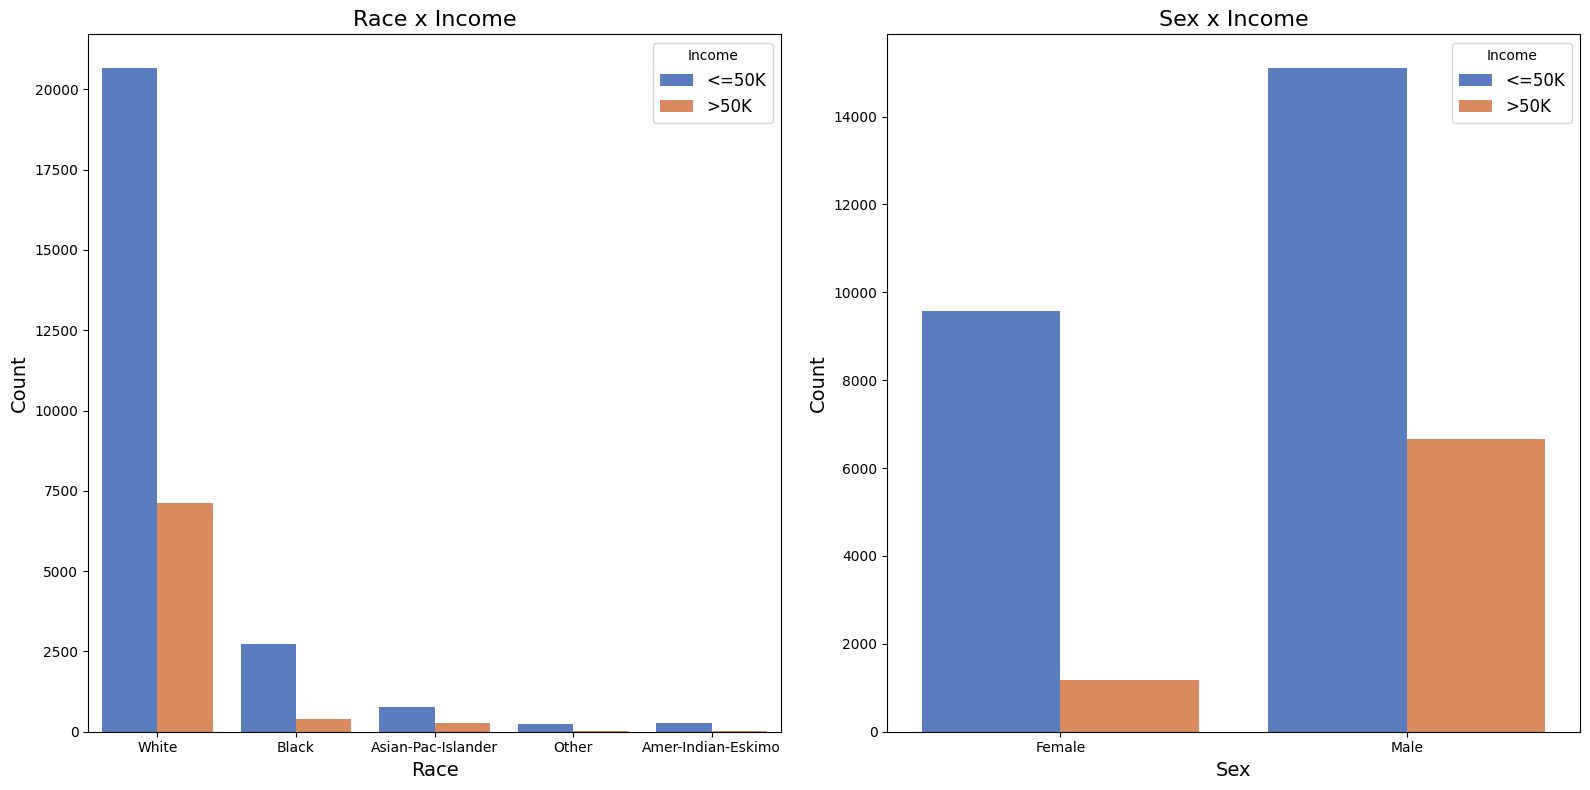

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(data=df, x='race', hue='income', palette='muted', ax=axes[0])
axes[0].set_title('Race x Income', fontsize=16)
axes[0].set_xlabel('Race', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Income', fontsize=12)

sns.countplot(data=df, x='sex', hue='income', palette='muted', ax=axes[1])
axes[1].set_title('Sex x Income', fontsize=16)
axes[1].set_xlabel('Sex', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Income', fontsize=12)

plt.tight_layout()

plt.show()

In [50]:
df.shape

(32537, 15)

# Saving the dataset after filtration to use for later insights

In [51]:
df.to_csv('processed_data.csv', index=False)


# Step 3: ➡

# Now let's build the Dashboard
